# Project:  Time of Day Patterns in San Francisco Crimes during 2014 Summer

@author Ashish V. Thapliyal
Copyright (c) Dec 2015. All Rights Reserved. 

##Test Rendering

In [107]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data
data = pd.read_csv('sanfrancisco_incidents_summer_2014.csv')

# Add a column for the nearest hour at which the crime occured
def toNearestHour(str): # Round time to nearest hour
    hr, min = map(int, str.split(':')) # 'x:y' -> x,y -> hr, min
    if min > 29:
        hr += 1 
    return hr % 24 

data['hour'] = data['Time'].apply(lambda x: toNearestHour(x)) 

# Add a column for the month in which the crime occured
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
def toMonth(str):
    mm, dd, yyyy = map(int, str.split('/')) # 'x/y/z' -> x,y,z -> mm, dd, yyyy
    return months[mm-1] 

data['month'] = data['Date'].apply(lambda x: toMonth(x)).reindex(months) 

In [110]:
data

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,hour,month
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031,0,Aug
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000,0,Aug
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244,0,Aug
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,37.772518,"(37.7725176473142, -122.485262988324)",14617753106244,0,Aug
4,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,08/31/2014,23:23,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895,37.772313,"(37.7723131976814, -122.509895418239)",14073422072000,23,Aug
5,140734349,DRUG/NARCOTIC,POSSESSION OF MARIJUANA,Sunday,08/31/2014,23:13,SOUTHERN,"ARREST, BOOKED",11TH ST / MINNA ST,-122.416578,37.773907,"(37.773907074489, -122.416578493475)",14073434916010,23,Aug
6,140734349,DRUG/NARCOTIC,POSSESSION OF CONTROLLED SUBSTANCE FOR SALE,Sunday,08/31/2014,23:13,SOUTHERN,"ARREST, BOOKED",11TH ST / MINNA ST,-122.416578,37.773907,"(37.773907074489, -122.416578493475)",14073434916662,23,Aug
7,140734349,DRIVING UNDER THE INFLUENCE,DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL,Sunday,08/31/2014,23:13,SOUTHERN,"ARREST, BOOKED",11TH ST / MINNA ST,-122.416578,37.773907,"(37.773907074489, -122.416578493475)",14073434965050,23,Aug
8,140738147,OTHER OFFENSES,EVADING A POLICE OFFICER RECKLESSLY,Sunday,08/31/2014,23:00,INGLESIDE,NONE,1400 Block of DOLORES ST,-122.424498,37.746649,"(37.7466488718366, -122.424497944857)",14073814727175,23,Aug
9,140734258,TRESPASS,TRESPASSING,Sunday,08/31/2014,23:00,CENTRAL,"ARREST, CITED",900 Block of MASON ST,-122.410846,37.792316,"(37.7923158747647, -122.410845624227)",14073425827195,23,Aug


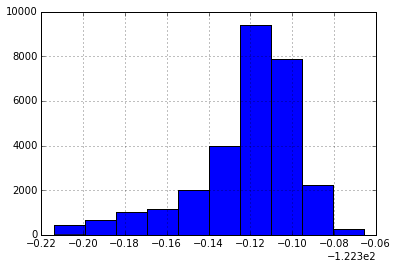

In [67]:
data['X'].hist(); 

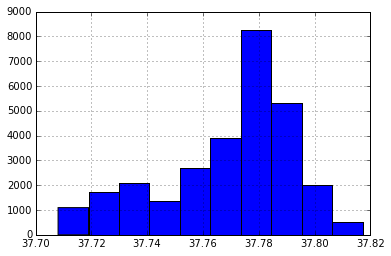

In [68]:
data['Y'].hist()

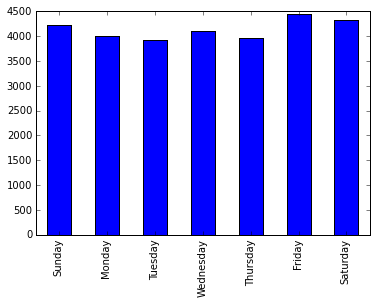

In [76]:
data['DayOfWeek'].value_counts().reindex(['Sunday', 'Monday', "Tuesday", 'Wednesday', 'Thursday', 'Friday', 'Saturday']).plot(kind="bar")

##Crime Dependence on Neighborhood

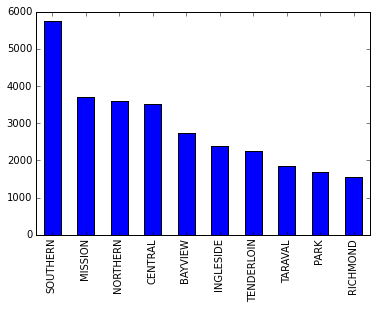

In [70]:
data['PdDistrict'].value_counts().plot(kind='bar')

#Crime Dependence on Hour of Day

In [58]:
def toNearestHour(str): # Round time to nearest hour
    hr, min = map(int, str.split(':')) # 'x:y' -> x,y -> hr, min
    if min > 29:
        hr += 1 
    return hr % 24 

data['hour'] = data['Time'].apply(lambda x: toNearestHour(x)) 

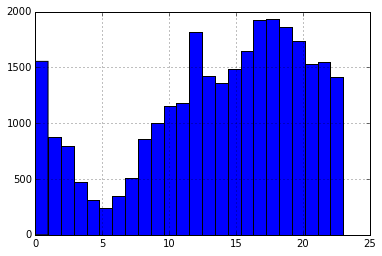

In [80]:
data['hour'].hist(bins=24)

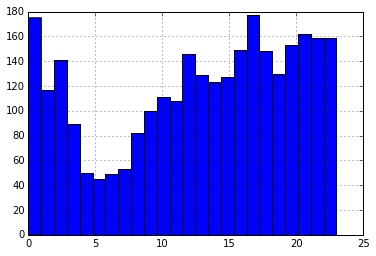

In [93]:
# data['hour'].hist(bins=24, by=data['Category']) # This should work but there seems to be bug in matplotlib so we need to work around
assaults = data[data['Category']=='ASSAULT']
assaults['hour'].hist(bins=24)

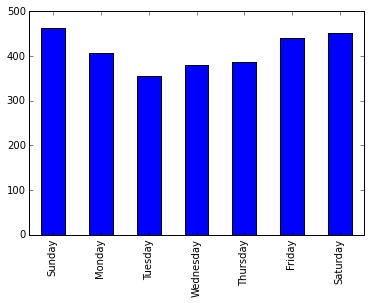

In [94]:
assaults['DayOfWeek'].value_counts().reindex(['Sunday', 'Monday', "Tuesday", 'Wednesday', 'Thursday', 'Friday', 'Saturday']).plot(kind="bar")